In [1]:
import tweepy

In [2]:
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns

In [ ]:
Tweets Word Count Disribution

Sentiment Disribution of the Tweets

Positive Tweets Wordcloud

Negative Tweets Wordcloud

Neutral Tweets Wordcloud

All Tweets Wordcloud

Most Frequent words used in the Neutral Tweets

Most Frequent words used in the Negative Tweets

Most Frequent words used in the Positive Tweets

Most Frequent words used in all the Tweets


# United Nations Human Rights Twitter Sentiment Analysis

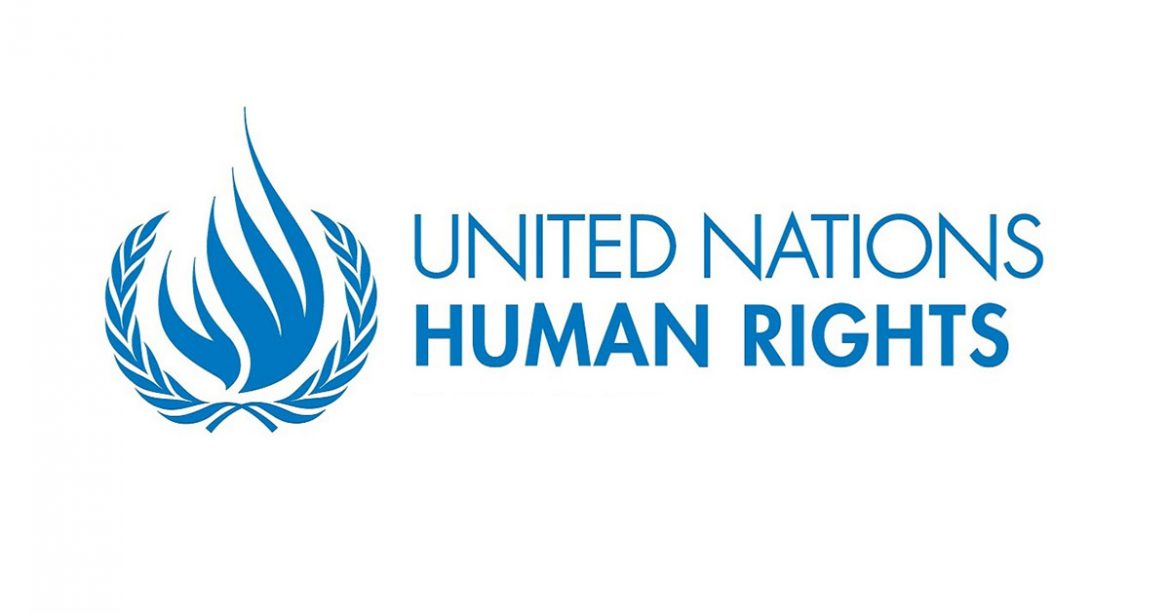

In [57]:
from IPython.display import Image
Image(filename='humanrights.jpg')

In [3]:
import nltk
from nltk.corpus import stopwords

In [ ]:
# Twitter Credentials

consumer_key = ##########
consumer_secret = ########

access_token = #########
access_token_secret = #############

In [61]:
# Twitter Credentials

consumer_key = 'jDvT8Ydto8ABvgx0JsNqcOZsS'
consumer_secret = 'OTZkuey2d0YNxHIWZDp5O6vZ7A1bhod7KZzf1eOXV1Qxi8OwxG'

access_token = '1249542581660323845-JUclgVDUla2o1S0evqsi9C0sRsRWxF'
access_token_secret = 'FKMJkElmc0tFuGYYDxKCjKa6g6l2OFPL31sHfPZRiOn8v'

In [62]:
authenticate = tweepy.OAuthHandler(consumer_key, consumer_secret) 

In [63]:
authenticate.set_access_token(access_token, access_token_secret) 

In [64]:
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [65]:
screen_name1 = 'UNHumanRights'

In [66]:
alltweets = []  
    
    #make initial request for most recent tweets (200 is the maximum allowed count)
new_tweets = api.user_timeline(screen_name = screen_name1,count=200)
    
    #save most recent tweets
alltweets.extend(new_tweets)
    
    #save the id of the oldest tweet less one
oldest = alltweets[-1].id - 1
    
    #keep grabbing tweets until there are no tweets left to grab
while len(new_tweets) > 0:
    #print(f"getting tweets before {oldest}")
        
        #all subsiquent requests use the max_id param to prevent duplicates
    new_tweets = api.user_timeline(screen_name = screen_name1,count=200,max_id=oldest)
        
        #save most recent tweets
    alltweets.extend(new_tweets)
        
        #update the id of the oldest tweet less one
    oldest = alltweets[-1].id - 1
        
    #print(f"...{len(alltweets)} tweets downloaded so far")
    

In [67]:
for j in alltweets:
    
    #print("retweet count is :", j.retweet_count)
    #print("tweet is :", j.full_text)
    totaltweet = j.user.statuses_count
    followin = j.user.friends_count
    Descriptio = j.user.description
    follower = j.user.followers_count
    Prof_image_ur = j.user.profile_image_url

# Twitter Account Description

In [68]:
print("Desrciption is :",Descriptio)

Desrciption is : The United Nations #HumanRights office is led by High Commissioner @MBachelet. Follow us on FB & IG at *unitednationshumanrights*. #StandUp4HumanRights


# Twitter Account Profile Image

Profile image url is : http://pbs.twimg.com/profile_images/920574376352854016/IYdtguxw_normal.jpg


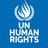

In [69]:
print("Profile image url is :", Prof_image_ur)
from IPython.display import Image
Profile_Image = Image(Prof_image_ur)
Profile_Image

# Twitter Account Followers

In [70]:
print('The number of followers this Twitter Account has are: ', follower)

The number of followers this Twitter Account has are:  3130865


# Twitter Account Following

In [71]:
print('The number of Twitter Accounts followed by this Twitter Account has are: ', followin)

The number of Twitter Accounts followed by this Twitter Account has are:  1527


# Total Tweets by this Twitter Account

In [72]:
print('The total number of tweets by this Twitter Account are:', totaltweet)

The total number of tweets by this Twitter Account are: 18306


In [73]:
twt = []
hshtg = []
retweet = []

for twee in alltweets:

    twt.append(twee.text)
    retweet.append(twee.retweet_count)
    hs = twee.entities['hashtags']
    if len(hs) != 0:
        
        hh_list = []
        for i in range(len(hs)):
            dct = hs[i]
            hh_list.append(str(dct.get('text')))
        hshtg.append(hh_list)
        
    else:
        hshtg.append([])
        

In [74]:
dicts = {'Tweets': twt, 'Hashtags': hshtg, 'Retweets':retweet}  

In [75]:
dfs = pd.DataFrame(dicts)

In [76]:
dfs.shape

(3248, 3)

# Tweets Dataset

In [77]:
dfs.head()

,Tweets,Hashtags,Retweets
0,"RT @mbachelet: Existing economic, social &amp;...",[],33
1,Thank you @GhadaFathiWaly for sharing this pho...,"[recoverbetter, standup4humanrights]",10
2,Thank you @DonaBertarelli for sharing this pho...,"[recoverbetter, standup4humanrights]",5
3,@KathleenKavalec @UN_BiH @MacdonaldIngrid @jos...,[],0
4,@monicapferro @RitaUNHR @dienekeita @NorwayAmb...,[],0


# Tweets Word Count Distribution

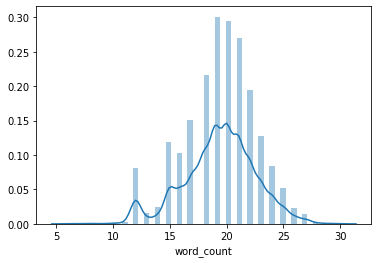

In [78]:
# Word Count Distribution Histogram

dfs["word_count"] = dfs["Tweets"].apply(lambda tweet: len(tweet.split()))
sns_plot = sns.distplot(dfs['word_count'])
fig = sns_plot.get_figure()
fig.savefig("unh_word_count.png")
sns.distplot(dfs['word_count'])

In [22]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [79]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [80]:
senti_analyzer = SentimentIntensityAnalyzer()

In [81]:
compound_score = []

for sen in dfs['Tweets']:
    
    compound_score.append(senti_analyzer.polarity_scores(sen)['compound'])

In [82]:
dfs['Compound Score'] = compound_score

In [83]:
Sentiment = []

for i in compound_score:
    
    if i >= 0.05:
        
        Sentiment.append('Positive')
        
    elif i > -0.05 and i < 0.05:
        
        Sentiment.append('Neutral')
        
    else:
        
        Sentiment.append('Negative')
        

In [84]:
dfs['Sentiment'] = Sentiment

In [85]:
pos_count = sum(dfs['Sentiment']=='Positive')
neg_count = sum(dfs['Sentiment']=='Negative')
neu_count = sum(dfs['Sentiment']=='Neutral')

# Sentiment Distribution of the Tweets

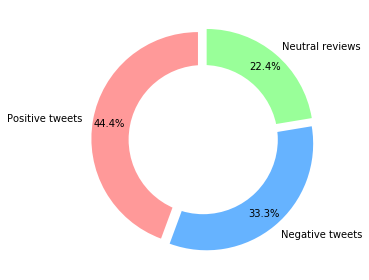

In [86]:
# Sentiment Distribution

pos_count = sum(dfs['Sentiment']=='Positive')
neg_count = sum(dfs['Sentiment']=='Negative')
neu_count = sum(dfs['Sentiment']=='Neutral')

import matplotlib.pyplot as plt
# Pie chart
labels = ['Positive tweets', 'Negative tweets', 'Neutral reviews']
sizes = [pos_count, neg_count, neu_count]
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
#explsion
explode = (0.05,0.05,0.05)
 
    
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.savefig('unh_sentiment_distribution.png')
plt.show()

# Most Positive Tweet

In [87]:
# Most Positive Tweet

pos_max = dfs.loc[dfs['Compound Score']==max(dfs['Compound Score'])]
pos_max

,Tweets,Hashtags,Retweets,word_count,Compound Score,Sentiment
1150,RT @UN: Human rights are for everyone – no mat...,[],2305,25,0.9801,Positive


# Most Negative Tweet

In [88]:
# Most Negative Tweet

neg_max = dfs.loc[dfs['Compound Score']==min(dfs['Compound Score'])]
neg_max

,Tweets,Hashtags,Retweets,word_count,Compound Score,Sentiment
1799,RT @UNESCO: No human being is illegal\nNo huma...,[],427,27,-0.9732,Negative


# Positive Tweets

In [89]:
# Positive Tweets

gp = dfs.groupby(by=['Sentiment'])
positive_tweets = gp.get_group('Positive')
positive_tweets.head()

,Tweets,Hashtags,Retweets,word_count,Compound Score,Sentiment
1,Thank you @GhadaFathiWaly for sharing this pho...,"[recoverbetter, standup4humanrights]",10,15,0.7845,Positive
2,Thank you @DonaBertarelli for sharing this pho...,"[recoverbetter, standup4humanrights]",5,15,0.7845,Positive
3,@KathleenKavalec @UN_BiH @MacdonaldIngrid @jos...,[],0,13,0.6486,Positive
4,@monicapferro @RitaUNHR @dienekeita @NorwayAmb...,[],0,15,0.6486,Positive
5,@EU_UNGeneva @OlofBSkoog @EUatUN @UNHumanRight...,[],1,15,0.6486,Positive


In [102]:
positive_tweets.shape

(1441, 6)

# Negative Tweets

In [90]:
# Negative Tweets

negative_tweets = gp.get_group('Negative')
negative_tweets.head()

,Tweets,Hashtags,Retweets,word_count,Compound Score,Sentiment
0,"RT @mbachelet: Existing economic, social &amp;...",[],33,21,-0.0516,Negative
10,🇸🇸#SouthSudan: Violence involving civil defenc...,[SouthSudan],22,17,-0.5719,Negative
27,"Even in times of crisis, governments still nee...",[],41,22,-0.6249,Negative
28,"To recover from the crisis, we must also addre...",[],23,21,-0.3612,Negative
31,RT @UNTreatyBodies: Female genital mutilation ...,[],36,20,-0.2960,Negative


In [103]:
negative_tweets.shape

(1080, 6)

# Neutral Tweets

In [91]:
# Neutral Tweets

neutral_tweets = gp.get_group('Neutral')
neutral_tweets.head()

,Tweets,Hashtags,Retweets,word_count,Compound Score,Sentiment
9,@VaruhCPRS @BorutPahor @IgorZorcic @JanezLenar...,[],0,11,0.0000,Neutral
13,“Voices” is an album by @maxrichtermusic based...,[],23,19,0.0000,Neutral
17,@RitaUNHR @BTahzibLie @tariqahmadbt @jmsroscoe...,[],0,9,0.0000,Neutral
22,@MacdonaldIngrid @UN_BiH @mbachelet @KathleenK...,[],0,10,0.0000,Neutral
24,#Afghanistan: While the justice system’s respo...,[Afghanistan],46,18,0.0258,Neutral


In [105]:
neutral_tweets.shape

(727, 6)

# Wordcloud Function

In [92]:
# Wordcloud Function

def plot_Cloud(wordCloud):
    plt.figure( figsize=(20,10), facecolor='w')
    plt.imshow(wordCloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

In [93]:
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['amp','suppo','de','la', 'el','en','mbachelet','expe','must']
stopwords.extend(newStopWords)

In [94]:
def wordcloud(data):
    
    words_corpus = ''
    words_list = []

    
    for rev in data["Tweets"]:
        
        text = str(rev).lower()
        text = text.replace('rt', ' ') 
        text = re.sub(r"http\S+", "", text)        
        text = re.sub(r'[^\w\s]','',text)
        text = ''.join([i for i in text if not i.isdigit()])
        
        tokens = nltk.word_tokenize(text)
        tokens = [word for word in tokens if word not in stopwords]
        
        # Remove aplha numeric characters
        
        for words in tokens:
            
            words_corpus = words_corpus + words + " "
            words_list.append(words)
            
    return words_corpus, words_list

In [ ]:
import cv2
image1 = cv2.imread('mask1.png')
mask = np.array(image1)

# WordCloud - Positive Tweets

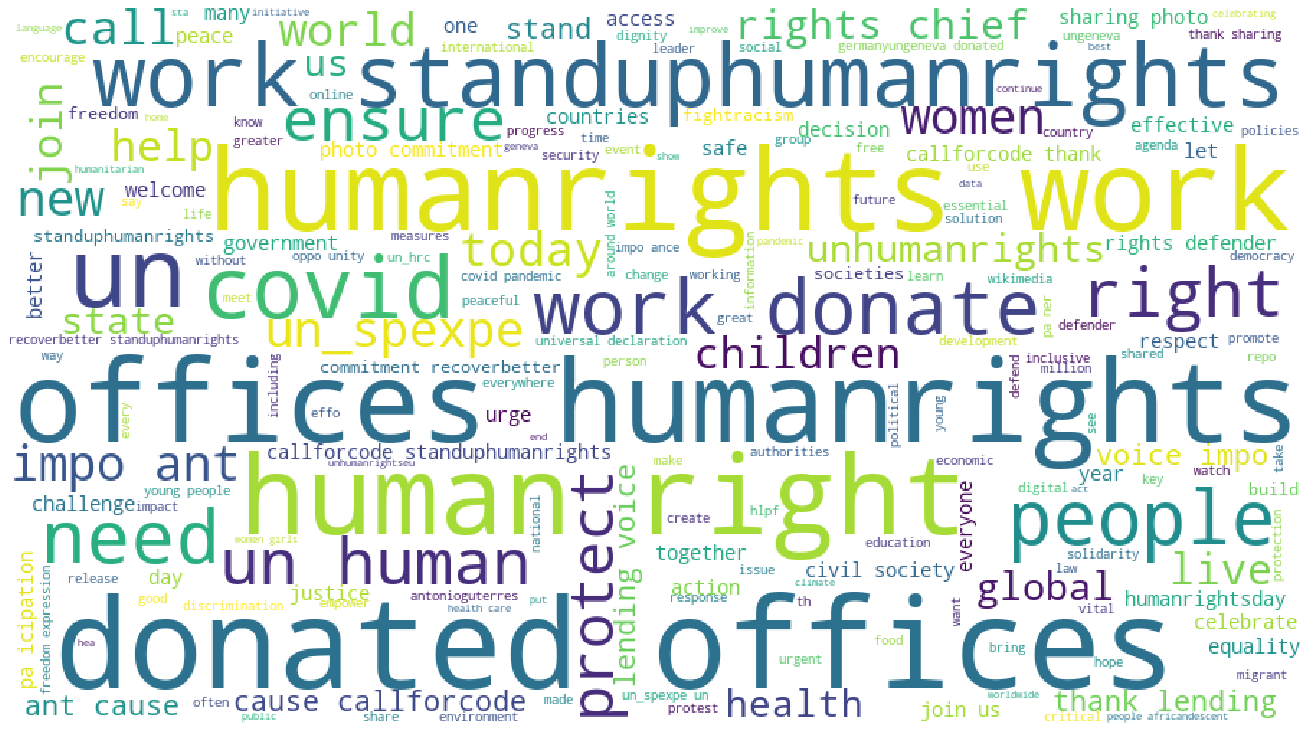

In [95]:
# WordCloud - Positive Tweets

from wordcloud import WordCloud
positive_wordcloud = WordCloud(background_color= "white",mask=mask,width=900, height=500).generate(wordcloud(positive_tweets)[0])
    
plot_Cloud(positive_wordcloud)
positive_wordcloud.to_file('unh_positive_tweets_wc.png')

# WordCloud - Negative Tweets

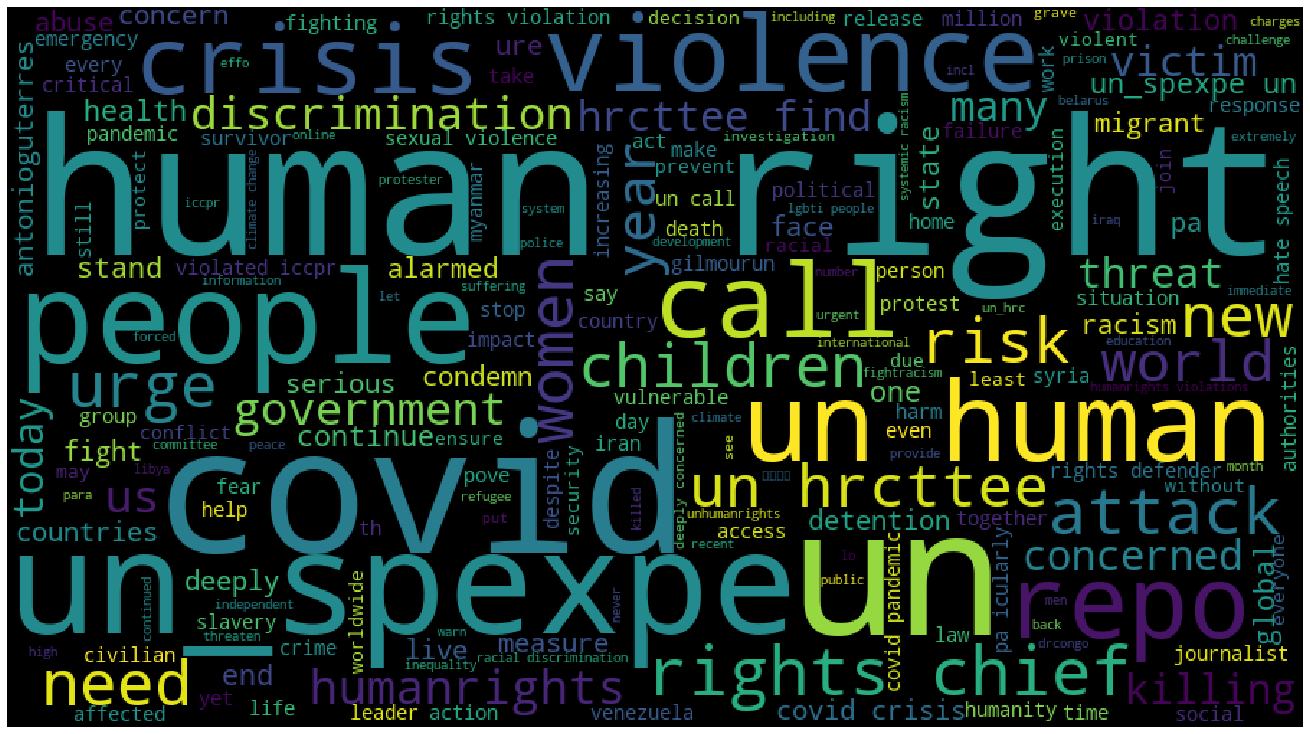

In [96]:
# WordCloud - Negative Tweets

negative_wordcloud = WordCloud(mask=mask,width=900, height=500).generate(wordcloud(negative_tweets)[0])

plot_Cloud(negative_wordcloud)
negative_wordcloud.to_file('unh_negative_tweets_wc.png')


# WordCloud - Neutral Tweets

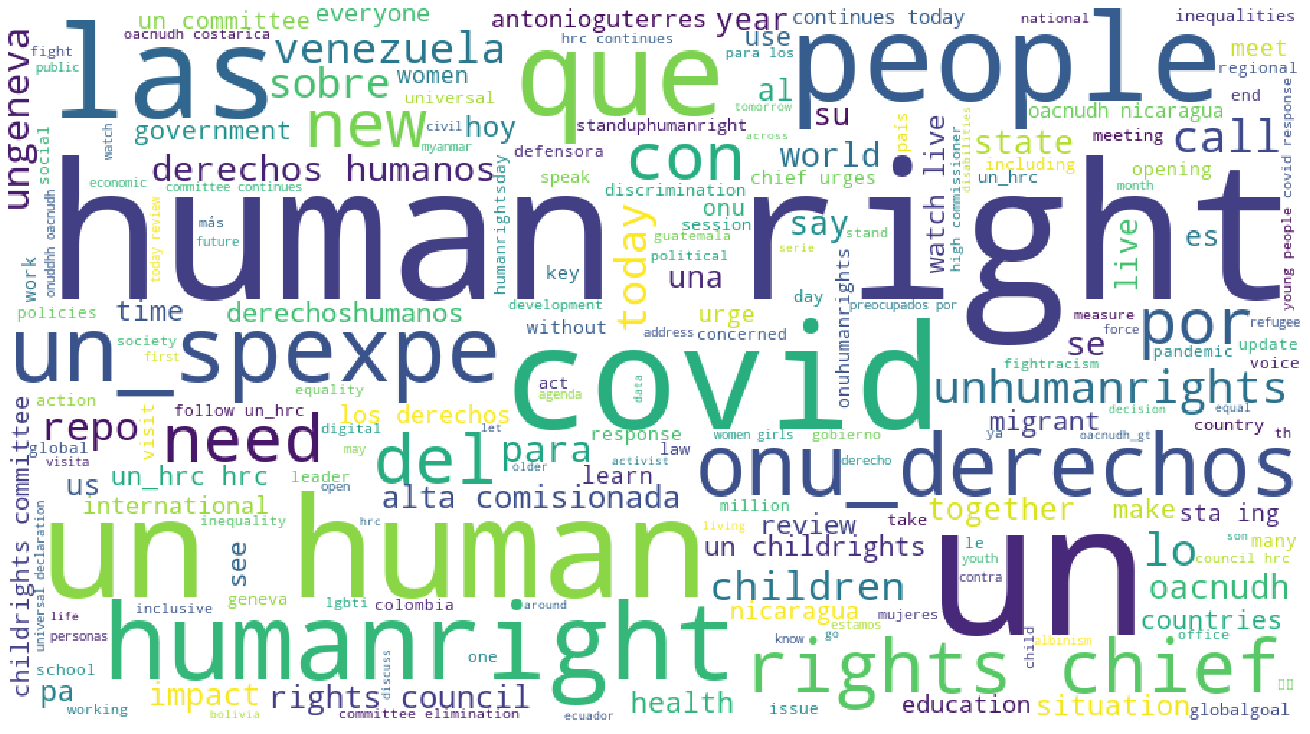

In [97]:
# WordCloud - Neutral Tweets

neutral_wordcloud = WordCloud(background_color= "white",mask=mask,width=900, height=500).generate(wordcloud(neutral_tweets)[0])

plot_Cloud(neutral_wordcloud)
neutral_wordcloud.to_file('unh_neutral_tweets_wc.png')


# Wordcloud - All Tweets

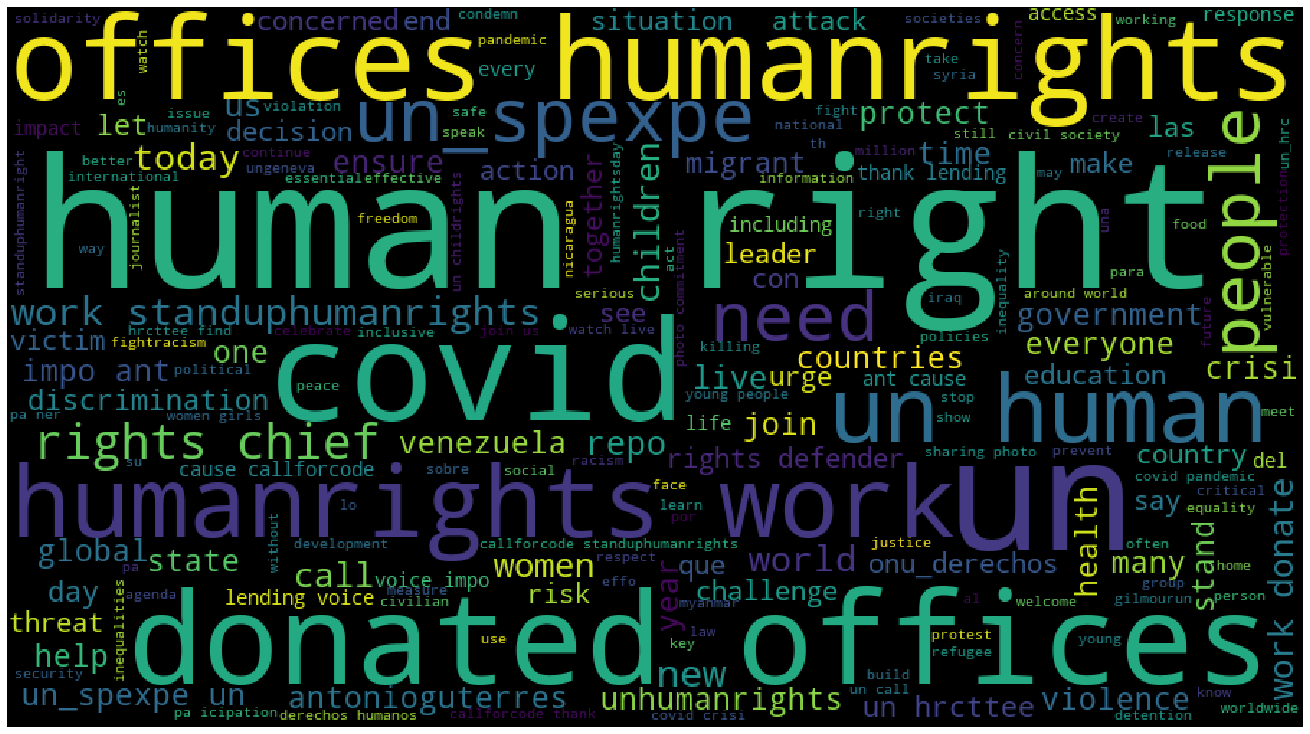

In [98]:
# Wordcloud - All Tweets

total_wordcloud = WordCloud(mask=mask,width=900, height=500).generate(wordcloud(dfs)[0])

plot_Cloud(total_wordcloud)
total_wordcloud.to_file('unh_total_tweets_wc.png')


# Most Frequent Words in all the Tweets

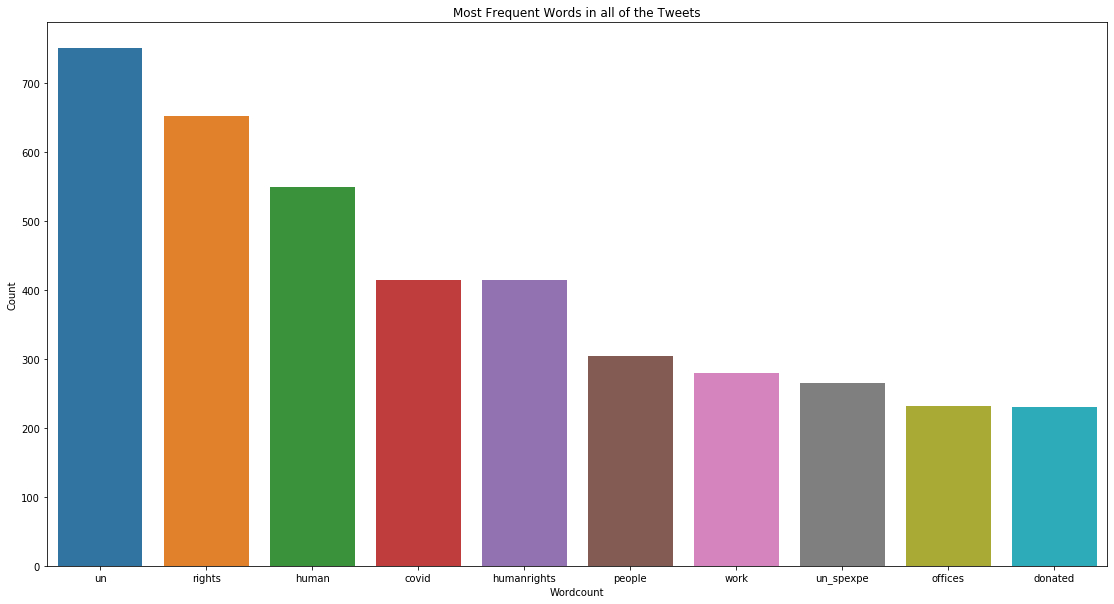

In [99]:
# Most Frequent Words - Total Tweets

aa = nltk.FreqDist(wordcloud(dfs)[1])
dd = pd.DataFrame({'Wordcount': list(aa.keys()),
                  'Count': list(aa.values())})
# selecting top 10 most frequent hashtags     
dd = dd.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(19,10))
plt.title('Most Frequent Words in all of the Tweets')
ax = sns.barplot(data=dd,palette="Purples_r", x= "Wordcount", y = "Count")
ax.set(ylabel = 'Count')
fig = ax.get_figure()
fig.savefig("unh_total_tweets_wf.png")
plt.show()

# Most Frequent Words in the Positive Tweets

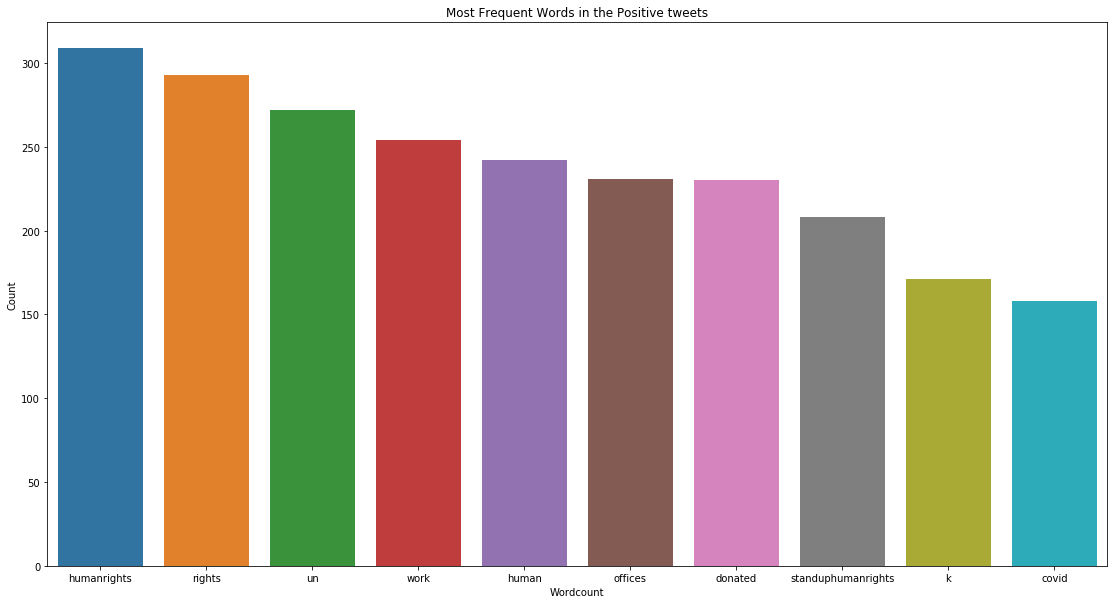

In [100]:
# Most Frequent Words - Positive Tweets

ap = nltk.FreqDist(wordcloud(positive_tweets)[1])
dp = pd.DataFrame({'Wordcount': list(ap.keys()),
                  'Count': list(ap.values())})
# selecting top 10 most frequent hashtags     
dp = dp.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(19,10))
plt.title('Most Frequent Words in the Positive tweets')
ax = sns.barplot(data=dp, palette="rocket",x= "Wordcount", y = "Count")
ax.set(ylabel = 'Count')
fig = ax.get_figure()
fig.savefig("unh_positive_tweets_wf.png")
plt.show()

# Most Frequent Words in the Negative Tweets

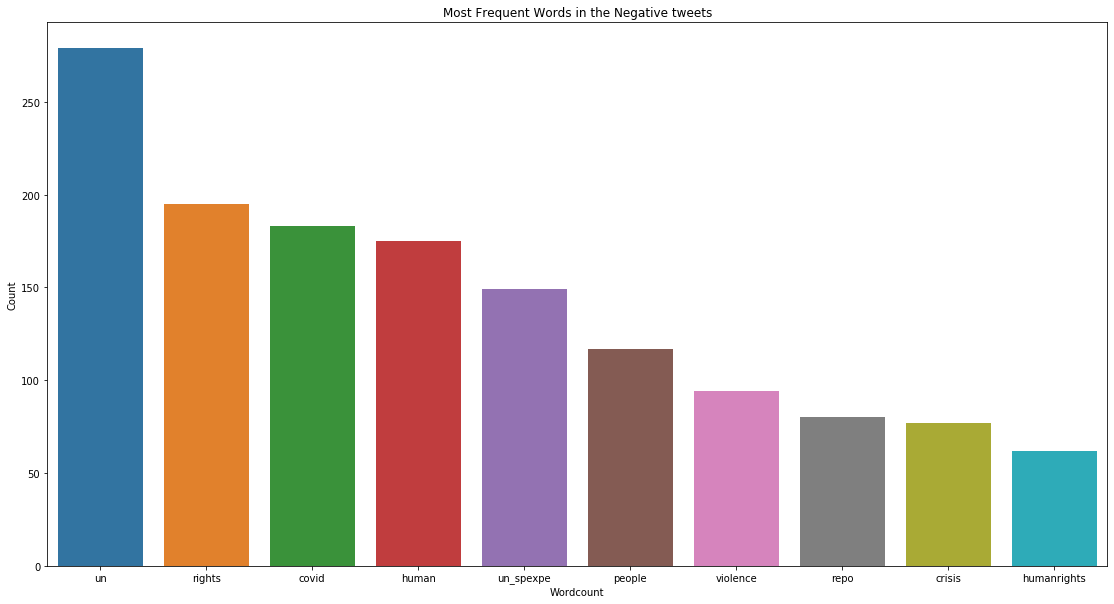

In [101]:
# Most Frequent Words - Negative Tweets

an = nltk.FreqDist(wordcloud(negative_tweets)[1])
dn = pd.DataFrame({'Wordcount': list(an.keys()),
                  'Count': list(an.values())})
# selecting top 10 most frequent hashtags     
dn = dn.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(19,10))
plt.title('Most Frequent Words in the Negative tweets')
ax = sns.barplot(data=dn,palette="gray", x= "Wordcount", y = "Count")
ax.set(ylabel = 'Count')
fig = ax.get_figure()
fig.savefig("unh_negative_tweets_wf.png")
plt.show()

# Most Frequent words used in the Neutral Tweets

In [ ]:
# Most Frequent Words - Neutral Tweets

au = nltk.FreqDist(wordcloud(neutral_tweets)[1])
du = pd.DataFrame({'Wordcount': list(au.keys()),
                  'Count': list(au.values())})
# selecting top 10 most frequent hashtags     
du = du.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(19,10))
plt.title('Most Frequent Words in the Neutral tweets')
ax = sns.barplot(data=du,palette= "Blues_d", x= "Wordcount", y = "Count")
ax.set(ylabel = 'Count')
fig = ax.get_figure()
fig.savefig("unh_neutral_tweets_wf.png")
plt.show()